## Задание 05 

In [1]:
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline
import networkx as nx
import pandas as pd

import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc

### 1. Влияние топологии на характерное время распространение эпидемии в SI модели.

* Сгенерируйте случайные графы из разных моделей: Эрдеша-Реньи, Барабаши-Альберта, Ваттса-Строгатца. 

Число вершин всех графов $N=10^4$, а средняя степень у всех примерно одинакова и, например, $\left< k\right>\approx10$. 

* Смоделируйте SI модель, изобразите на одном графике среднюю долю инфицированных от времени для разных графов.  

Параметры модели SI - $\beta$ и число шагов по времени - подберите самостоятельно. Усреднение можно проводить по 100 запускам SI (Не по графам!!!).

На этом же графике изобразите кривую, отвечающую приближению среднего поля. 

* Видите ли вы отличия в распространении эпидемии? Объясните результаты. 

In [2]:
N = 10000
G1 = nx.erdos_renyi_graph(N, 0.001, seed=0)
G2 = nx.barabasi_albert_graph(N, 5, seed=0)
G3 = nx.watts_strogatz_graph(N, 10, 0.01, seed=0)
Graphs = [G1, G2, G3]

In [3]:
for G in Graphs:
    degrees=[d for node, d in G.degree()]
    print('Средняя степень вершины',  np.mean(degrees))

Средняя степень вершины 10.022
Средняя степень вершины 9.995
Средняя степень вершины 10.0


In [4]:
def si_func(x0,beta_k,t):
    return x0*np.exp(beta_k*t)/(1-x0+x0*np.exp(beta_k*t))

In [5]:
beta=0.01 
n_iter=120
t=np.linspace(0,n_iter-1,n_iter)
n_run=100
beta_k=0.1

mean_infected = []
for G in Graphs:
    stats = {'susceptible' : [], 'infected': []}
    for i in range(n_run):
        si_model = ep.SIModel(G) #
        config = mc.Configuration()
        config.add_model_parameter('beta', beta)
        config.add_model_parameter("percentage_infected", 0.01)
        si_model.set_initial_status(config)
        iterations = si_model.iteration_bunch(n_iter)
        susceptible, infected= [],[]
        for iteration in iterations:
            node_count = iteration['node_count']
            susceptible.append(node_count[0]/N)
            infected.append(node_count[1]/N)
        stats['susceptible'].append(susceptible)
        stats['infected'].append(infected) 
    mean_infected.append(np.mean(np.array(stats['infected']), axis=0))

100%|██████████| 120/120 [00:02<00:00, 40.49it/s]


100%|██████████| 120/120 [00:03<00:00, 34.72it/s]


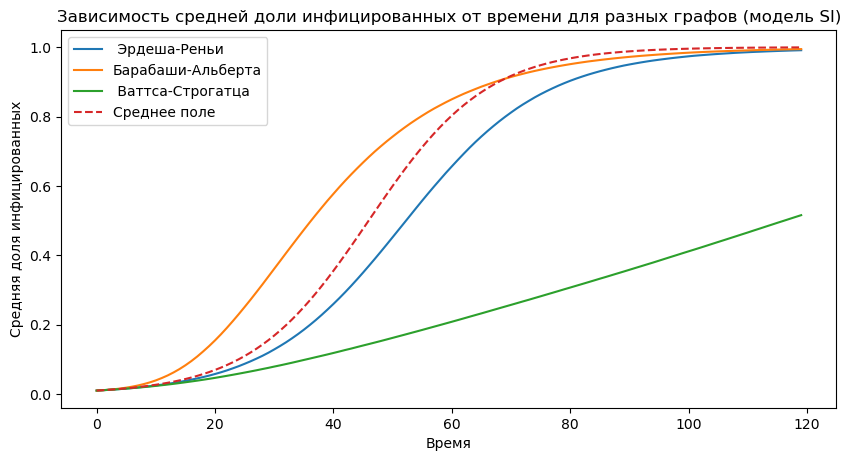

In [6]:
fig = plt.figure(figsize=(10,5),dpi=100)
plt.plot(t,mean_infected[0])
plt.plot(t,mean_infected[1])
plt.plot(t,mean_infected[2])
plt.plot(t,si_func(0.01,beta_k,t), '--')
plt.legend([' Эрдеша-Реньи', 'Барабаши-Альберта', ' Ваттса-Строгатца', 'Среднее поле'])
plt.xlabel('Время')
plt.ylabel('Средняя доля инфицированных')
plt.title('Зависимость средней доли инфицированных от времени для разных графов (модель SI)');

Наиболее быстрое распространение происходит в графе Барабаши-Альберта, наименьшая скорость роста доли инфицированных наблюдается в графе Ваттса-Строгатца. В результате можно сделать вывод, что структура графа влияет на характерное время распространение эпидемии. Наиболее быстрое распространение происходит в графе Барабаши-Альберта за счет образования безмасштабной сети (т.е. степени вершин подчиняются степенному закону) по принципу предпочтительного присоедиения, что приводит к образованию хабов. В графах же Эрдеша-Реньи и Ваттса-Строгатца вероятность образования хабов ниже.

### 2. Порог зажигания в модели SIS.
Рассмотрим модель SIS с параметром $\mu=1$ на двух графах из задания 1: Эрдеша-Реньи и Барабаши-Альберта. 
Так как $\left< k\right>\approx10$ и $\mu=1$, то пороговое значение $\beta$, выше которого  эпидемия не затухает из приближения среднего поля:
$$
\beta=\frac{1}{\left< k\right>}\approx 0.1,
$$

Постройте зависимость средней доли зараженных в сетях от параметра $\beta$, $\beta \in\left[0,0.2 \right]$. Усреднение проводите по 100 запускам SIS. Число шагов по времени (итераций) определите самостоятельно. 

In [18]:
beta = np.linspace(0, 0.2, 5)
n_run=100
n_iter=120

mean_infected = []
for b in beta: 
    stats = {'susceptible' : [], 'infected': []}
    for i in range(n_run):
        sis_model = ep.SISModel(G1)
        config = mc.Configuration()
        config.add_model_parameter('beta', b)
        config.add_model_parameter('lambda', 1)
        config.add_model_parameter("percentage_infected", 0.03)
        sis_model.set_initial_status(config)
        iterations = sis_model.iteration_bunch(n_iter)
        susceptible, infected= [],[]
        for iteration in iterations:
            node_count = iteration['node_count']
            susceptible.append(node_count[0]/N)
            infected.append(node_count[1]/N)
        stats['susceptible'].append(susceptible)
        stats['infected'].append(infected) 
    mean_infected.append(np.mean(np.array(stats['infected']), axis=0))
    

100%|██████████| 120/120 [00:05<00:00, 21.97it/s]


100%|██████████| 120/120 [00:05<00:00, 23.67it/s]


100%|██████████| 120/120 [00:04<00:00, 26.03it/s]


100%|██████████| 120/120 [00:05<00:00, 23.65it/s]


In [19]:
mean_infected1 = []
for b in beta: 
    stats = {'susceptible' : [], 'infected': []}
    for i in range(n_run):
        sis_model = ep.SISModel(G2)
        config = mc.Configuration()
        config.add_model_parameter('beta', b)
        config.add_model_parameter('lambda', 1)
        config.add_model_parameter("percentage_infected", 0.03)
        sis_model.set_initial_status(config)
        iterations = sis_model.iteration_bunch(n_iter)
        susceptible, infected= [],[]
        for iteration in iterations:
            node_count = iteration['node_count']
            susceptible.append(node_count[0]/N)
            infected.append(node_count[1]/N)
        stats['susceptible'].append(susceptible)
        stats['infected'].append(infected) 
    mean_infected1.append(np.mean(np.array(stats['infected']), axis=0))

100%|██████████| 120/120 [00:04<00:00, 24.05it/s]


100%|██████████| 120/120 [00:04<00:00, 25.88it/s]


100%|██████████| 120/120 [00:04<00:00, 26.24it/s]


100%|██████████| 120/120 [00:04<00:00, 25.45it/s]


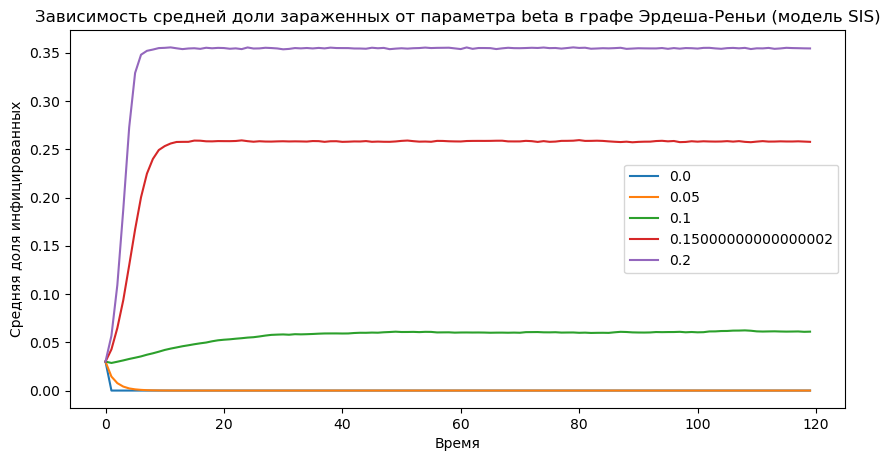

In [35]:
fig = plt.figure(figsize=(10,5),dpi=100)
for i in range(len(mean_infected)):
    plt.plot(t, mean_infected[i],)
plt.legend(beta)
plt.xlabel('Время')
plt.ylabel('Средняя доля инфицированных')
plt.title('Зависимость средней доли зараженных от параметра beta в графе Эрдеша-Реньи (модель SIS)');

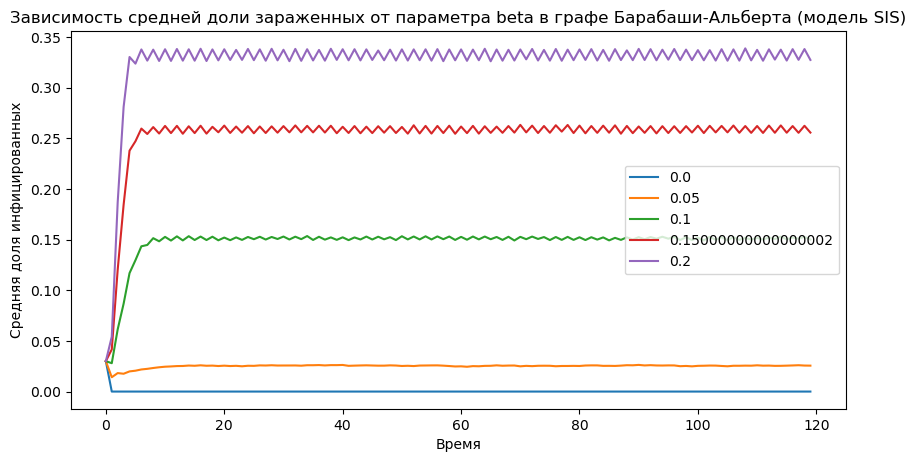

In [36]:
fig = plt.figure(figsize=(10,5),dpi=100)
for i in range(len(mean_infected1)):
    plt.plot(t, mean_infected1[i])
plt.legend(beta)
plt.xlabel('Время')
plt.ylabel('Средняя доля инфицированных')
plt.title('Зависимость средней доли зараженных от параметра beta в графе Барабаши-Альберта (модель SIS)');

In [44]:
graphs = [G1, G2]
beta = np.linspace(0, 0.2, 5)
n_run=100
n_iter= 60
j = 37

beta_infected = []
for G in graphs:
    mean_infected = []
    for b in beta: 
        infected = []
        for i in range(n_run):
            sis_model = ep.SISModel(G)
            config = mc.Configuration()
            config.add_model_parameter('beta', b)
            config.add_model_parameter('lambda', 1)
            config.add_model_parameter("percentage_infected", 0.03)
            sis_model.set_initial_status(config)
            iterations = sis_model.iteration_bunch(n_iter)
            inf=0
            for node in iterations[j]['status']:
                if(iterations[j]['status'][node]==1):
                    inf +=1 
            infected.append(inf/N)
        mean_infected.append(np.mean(infected))
    beta_infected.append(mean_infected)

100%|██████████| 60/60 [00:02<00:00, 20.93it/s]


100%|██████████| 60/60 [00:02<00:00, 24.28it/s]


100%|██████████| 60/60 [00:02<00:00, 23.29it/s]


100%|██████████| 60/60 [00:02<00:00, 24.94it/s]


100%|██████████| 60/60 [00:02<00:00, 24.68it/s]


100%|██████████| 60/60 [00:02<00:00, 23.86it/s]


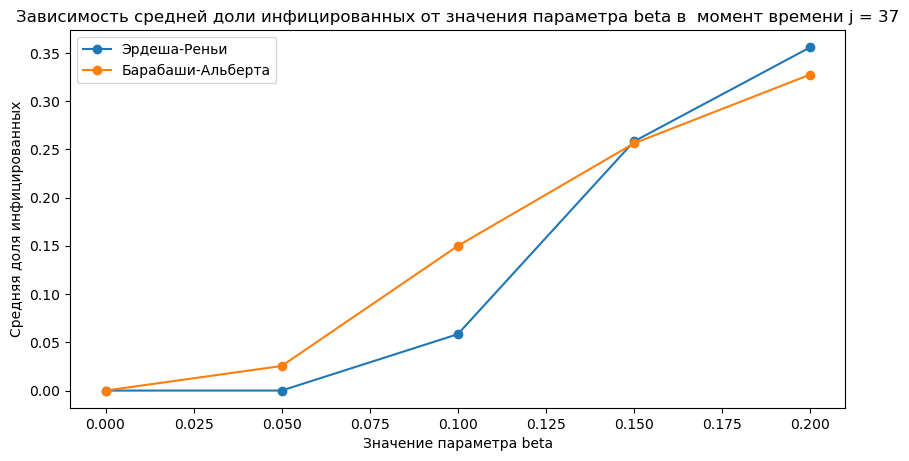

In [47]:
fig = plt.figure(figsize=(10,5),dpi=100)
for i in range(len(beta_infected)):
    plt.plot(beta, beta_infected[i], '-o')
plt.xlabel('Значение параметра beta')
plt.ylabel('Средняя доля инфицированных')
plt.title('Зависимость средней доли инфицированных от значения параметра beta в  момент времени j = '+ str(j));
plt.legend(['Эрдеша-Реньи', 'Барабаши-Альберта']);

Из полученных результатов видно, что в графе Барабаши-Альберта скорость распространения эпидемии выше, чем в графе Эрдеша-Реньи уже при более низких значениях параметра beta, отвечающего за вероятность заражения. Что происходит за счет безмасштабности графа Барабаши-Альберта. 

### 3. Влияние топологии в модели SIR.
Рассмотрим модель SIR на следующих сетях: 

In [48]:
G1=nx.read_graphml('graph1.graphml')
G2=nx.read_graphml('graph2.graphml')

* Постройте зависимости средней доли зараженных вершин в модели SIR для первого и второго графа.

Параметры для моделирования:

In [49]:
beta=0.005
gamma=0.03
percentage_infected=0.002
n_iter=200 # число шагов моделирования
n_run=100 # число запусков распространения для усреднения

In [50]:
Graphs = [G1, G2]
t=np.linspace(0,n_iter-1,n_iter)

sir_infected =[]
for G in Graphs:
    stats = {'susceptible' : [], 'infected': [], 'recovered': []}
    for i in range(n_run):
        sir_model = ep.SIRModel(G)
        config = mc.Configuration()
        config.add_model_parameter('beta', beta)
        config.add_model_parameter('gamma', gamma)
        config.add_model_parameter("percentage_infected", percentage_infected)
        sir_model.set_initial_status(config)
        iterations = sir_model.iteration_bunch(n_iter)
        susceptible,infected,recovered = [],[],[]
        for iteration in iterations:
            node_count = iteration['node_count']
            susceptible.append(node_count[0]/N)
            infected.append(node_count[1]/N)
            recovered.append(node_count[2]/N)
        stats['susceptible'].append(susceptible)
        stats['infected'].append(infected) 
        stats['recovered'].append(recovered) 
    sir_infected.append(np.mean(np.array(stats['infected']), axis=0))

100%|██████████| 200/200 [00:00<00:00, 532.81it/s]


100%|██████████| 200/200 [00:00<00:00, 495.48it/s]


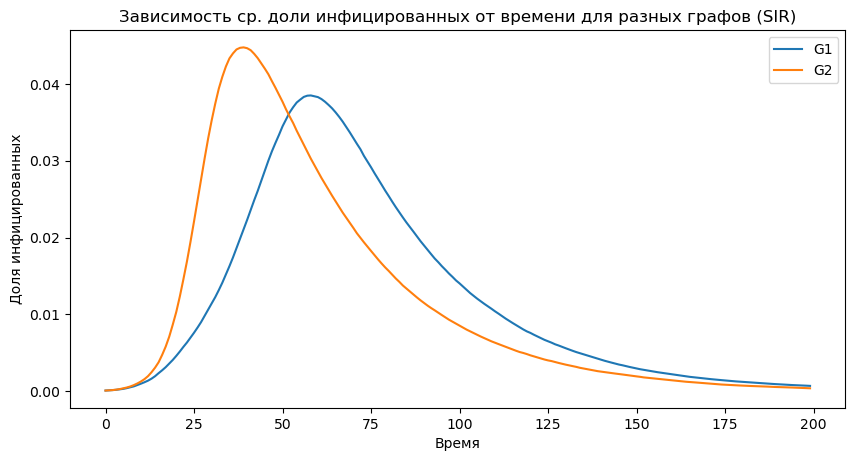

In [51]:
fig = plt.figure(figsize=(10,5),dpi=100)
for i in range(len(sir_infected)):
    plt.plot(t, sir_infected[i])
plt.legend(['G1', 'G2'])
plt.xlabel('Время')
plt.ylabel('Доля инфицированных')
plt.title('Зависимость ср. доли инфицированных от времени для разных графов (SIR)');

* Отличаются ли построенные зависимости? 
Попробуйте понять, что влияет на распространение в сети, для этого исследуйте топологию G1, G2. 

In [52]:
degrees1=[d for node, d in G1.degree()]
degrees2=[d for node, d in G2.degree()]
print('Средняя степень вершины G1: ', np.mean(degrees1))
print('Средняя степень вершины G2: ', np.mean(degrees2))

Средняя степень вершины G1:  59.82666666666667
Средняя степень вершины G2:  59.82666666666667


In [53]:
print('Средний кратчайший путь G1: ', nx.average_shortest_path_length(G1))
print('Средний кратчайший путь G2: ', nx.average_shortest_path_length(G2))

Средний кратчайший путь G1:  2.665915442812639
Средний кратчайший путь G2:  1.9278469069870938


In [54]:
print('Диаметр G1: ', nx.diameter(G1))
print('Диаметр G2: ', nx.diameter(G2))

Диаметр G1:  4
Диаметр G2:  3


In [55]:
print('Cредний коэффициент кластеризации G1: ', nx.average_clustering(G1))
print('Cредний коэффициент кластеризации G2: ', nx.average_clustering(G2))

Cредний коэффициент кластеризации G1:  0.7119907907406062
Cредний коэффициент кластеризации G2:  0.07991608132532708


In [56]:
print('Коэффициент транзитивности G1: ', nx.transitivity(G1))
print('Коэффициент транзитивности G2: ', nx.transitivity(G2))

Коэффициент транзитивности G1:  0.7174942151227887
Коэффициент транзитивности G2:  0.07987609166231245


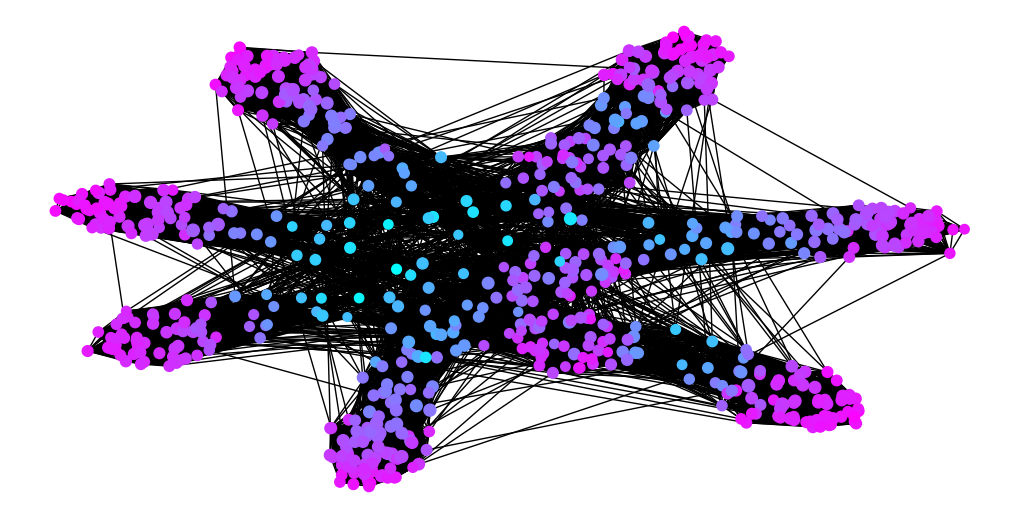

In [57]:
fig = plt.figure(figsize=(10,5),dpi=100)
clustering1 =list(nx.clustering(G1).values())
pos=nx.spring_layout(G1,iterations=20)
nx.draw(G1,pos,node_size=degrees1,with_labels=False, cmap=plt.cm.cool, node_color = clustering1)

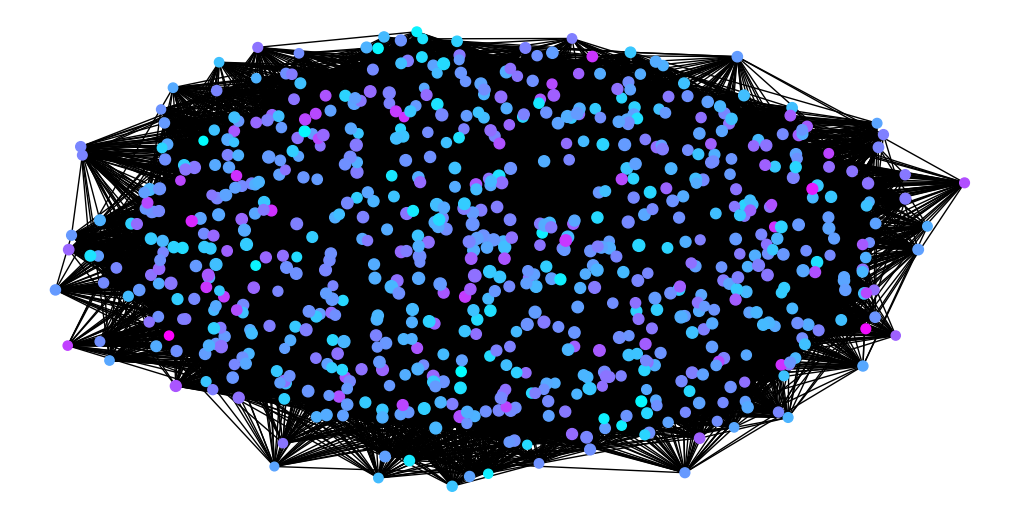

In [58]:
fig = plt.figure(figsize=(10,5),dpi=100)
clustering2 =list(nx.clustering(G2).values())
pos=nx.spring_layout(G2,iterations=20)
nx.draw(G2,pos,node_size=degrees2,with_labels=False, cmap=plt.cm.cool, node_color = clustering2)

Топология отличается средним коэффициентов кластеризации, что повлияло на различия в построенных зависимостях.